# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

%matplotlib inline
from matplotlib.dates import MonthLocator

In [2]:

# import file with data
msdata = pd.read_csv("msdata.csv")

In [3]:
msdata.isna()

,date,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
0,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False
1,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1997,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
msdata.isna().sum()


date                                0
BTC Price                           0
BTC network hashrate                0
Average BTC block size              0
NUAU - BTC                          0
Number TX - BTC                     0
Difficulty - BTC                    0
TX fees - BTC                       0
Estimated TX Volume USD - BTC       0
Gold in USD                       572
Ethereum Price                    982
Litecoin Price                      0
Bitcoin Cash Price               1687
Cardano Price                    1752
Nasdaq composite index            622
DJI                               622
dtype: int64

Very high number of missing values which can inluence negatively our dataset to apply various predicition models.

In [5]:
#fill the missing data with the forward values  
msdata['Gold in USD'] = msdata['Gold in USD'].ffill()
msdata['Nasdaq composite index'] = msdata['Nasdaq composite index'].ffill()
msdata['DJI'] = msdata['DJI'].ffill()

Filling the data is indeed sometimes necessary to avoid the analysis to be innacured or reveal very skewed values. However, for this dataset there are a few characteristics that explain some of the missing values. Firstly we have Gold, Nasdaq and DJI price data that reveal a consistent number of misisng values. Those missing values appear repetevely in 5 days intervals that can be explain by the fact that these assets are not traded during the weekends therefore there is no price for the assets on those days. In this case using the fill function makes sense to use to fill these gaps. Secondly, we have Ethereum, Cardano and Bitcoin Cash price data. These assets are cryptocurrencies that are available to trade 24/7 every day of the year without any interruptions. The missing values of these assets are represented by continous time gaps that represent the time where they start being traded. Since the data set goes as far as 2012, these assets were not yet available to trade at the time such as Bitcoin. For these reasons the author considered that using the fuction for these three cryptocurrecnies doesnt make sense.

In [6]:
# Checking the data set
msdata

,date,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
0,2012-11-16,0.00,2.361219e+01,0.116242,33886,37286,3.368767e+06,32.359210,4164666.0,1713.50,NaN,0.00,NaN,NaN,2853.129883,12588.30957
1,2012-11-17,0.00,2.361219e+01,0.117571,45125,34273,3.368767e+06,27.927683,2838875.0,1713.50,NaN,0.00,NaN,NaN,2853.129883,12588.30957
2,2012-11-18,0.00,2.662651e+01,0.090388,32677,33144,3.368767e+06,25.444356,2204342.0,1713.50,NaN,0.00,NaN,NaN,2853.129883,12588.30957
3,2012-11-19,0.00,2.059787e+01,0.120001,34545,35160,3.368767e+06,27.023499,3084759.0,1730.50,NaN,0.00,NaN,NaN,2916.070068,12795.95996
4,2012-11-20,0.00,2.662651e+01,0.102234,34632,37561,3.368767e+06,28.151598,2233941.0,1732.25,NaN,0.00,NaN,NaN,2916.679932,12788.50977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2018-06-01,7500.70,3.639694e+07,0.706884,454485,209526,4.310000e+12,21.654143,827851052.9,1294.60,578.67,118.03,995.66,0.224533,7554.330078,24635.21094
1996,2018-06-02,7536.72,3.554054e+07,0.721915,551182,205481,4.310000e+12,20.374766,867167014.2,1294.60,580.43,119.83,1003.33,0.222701,7554.330078,24635.21094
1997,2018-06-03,7632.09,3.254314e+07,0.622947,386673,174497,4.310000e+12,16.278420,520519261.6,1294.60,591.26,123.29,1083.13,0.227700,7554.330078,24635.21094
1998,2018-06-04,7722.53,3.489824e+07,0.771284,369974,163443,4.310000e+12,15.307404,485884807.3,1295.45,619.44,125.21,1170.78,0.228155,7606.459961,24813.68945


In [7]:
msdata.dtypes

date                              object
BTC Price                        float64
BTC network hashrate             float64
Average BTC block size           float64
NUAU - BTC                         int64
Number TX - BTC                    int64
Difficulty - BTC                 float64
TX fees - BTC                    float64
Estimated TX Volume USD - BTC    float64
Gold in USD                      float64
Ethereum Price                   float64
Litecoin Price                   float64
Bitcoin Cash Price               float64
Cardano Price                    float64
Nasdaq composite index           float64
DJI                              float64
dtype: object

In [8]:
msdata.describe()

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
count,2000.000000,2.000000e+03,2000.000000,2.000000e+03,2000.000000,2.000000e+03,2000.000000,2.000000e+03,2000.000000,1018.000000,2000.000000,313.000000,248.000000,2000.000000,2000.000000
mean,1739.176795,3.454577e+06,0.531079,2.977531e+05,152907.422000,4.519439e+11,85.178714,3.614914e+08,1281.986925,197.322561,25.734655,1112.964984,0.274431,4957.359487,18237.731958
std,3241.048852,7.020790e+06,0.329293,1.973732e+05,94971.420055,9.113960e+11,134.097900,7.144926e+08,128.448632,294.234156,53.870424,691.450840,0.233937,1138.650130,3058.404882
min,0.000000,1.742340e+01,0.062124,2.118600e+04,20555.000000,2.968775e+06,8.003076,1.371188e+06,1049.400000,0.000000,0.000000,212.180000,0.018414,2853.129883,12588.309570
25%,240.790000,4.328379e+04,0.202100,1.402290e+05,64894.250000,5.006861e+09,16.165392,4.190960e+07,1210.875000,8.442500,2.897500,546.470000,0.113291,4185.810059,16302.769530
50%,458.290000,3.958144e+05,0.482275,2.495050e+05,125041.000000,5.269984e+10,35.901795,8.987117e+07,1266.500000,13.120000,3.890000,1033.260000,0.224249,4858.385009,17673.919920
75%,965.480000,2.688504e+06,0.849976,4.418578e+05,228411.750000,3.370000e+11,74.647500,2.582939e+08,1320.600000,304.605000,15.492500,1435.360000,0.372888,5555.330078,19933.810550
max,19475.800000,3.918023e+07,1.110327,1.072861e+06,490644.000000,4.310000e+12,1495.946477,5.760245e+09,1750.500000,1397.480000,359.130000,3909.000000,1.170000,7637.859863,26616.710940


In [9]:
# set the dataset index by date
msdata = msdata.set_index("date")


In [10]:
msdata

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
date,,,,,,,,,,,,,,,
2012-11-16,0.00,2.361219e+01,0.116242,33886,37286,3.368767e+06,32.359210,4164666.0,1713.50,NaN,0.00,NaN,NaN,2853.129883,12588.30957
2012-11-17,0.00,2.361219e+01,0.117571,45125,34273,3.368767e+06,27.927683,2838875.0,1713.50,NaN,0.00,NaN,NaN,2853.129883,12588.30957
2012-11-18,0.00,2.662651e+01,0.090388,32677,33144,3.368767e+06,25.444356,2204342.0,1713.50,NaN,0.00,NaN,NaN,2853.129883,12588.30957
2012-11-19,0.00,2.059787e+01,0.120001,34545,35160,3.368767e+06,27.023499,3084759.0,1730.50,NaN,0.00,NaN,NaN,2916.070068,12795.95996
2012-11-20,0.00,2.662651e+01,0.102234,34632,37561,3.368767e+06,28.151598,2233941.0,1732.25,NaN,0.00,NaN,NaN,2916.679932,12788.50977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-01,7500.70,3.639694e+07,0.706884,454485,209526,4.310000e+12,21.654143,827851052.9,1294.60,578.67,118.03,995.66,0.224533,7554.330078,24635.21094
2018-06-02,7536.72,3.554054e+07,0.721915,551182,205481,4.310000e+12,20.374766,867167014.2,1294.60,580.43,119.83,1003.33,0.222701,7554.330078,24635.21094
2018-06-03,7632.09,3.254314e+07,0.622947,386673,174497,4.310000e+12,16.278420,520519261.6,1294.60,591.26,123.29,1083.13,0.227700,7554.330078,24635.21094


# Creating two separated datasets

In [11]:
pricedata = msdata.drop(labels=['BTC network hashrate', 'Average BTC block size',"NUAU - BTC","Number TX - BTC",
                                            "Difficulty - BTC","TX fees - BTC","Estimated TX Volume USD - BTC"], axis=1)


In order to facilitate the visualisation of the exploratory analysis the author decided to group the dataset into two separate ones. The first dataset includes all the assets that have price data to easily make a financial analysis of the assets and their price activity. Secondly, the author created a second dataset where the BTC price and all the variables related to the cryptocurrencie where included. This way the author can have a better understanding of their behaviovior and the influence that these vairables have on the bitcoin price.

In [12]:
pricedata

,BTC Price,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
date,,,,,,,,
2012-11-16,0.00,1713.50,NaN,0.00,NaN,NaN,2853.129883,12588.30957
2012-11-17,0.00,1713.50,NaN,0.00,NaN,NaN,2853.129883,12588.30957
2012-11-18,0.00,1713.50,NaN,0.00,NaN,NaN,2853.129883,12588.30957
2012-11-19,0.00,1730.50,NaN,0.00,NaN,NaN,2916.070068,12795.95996
2012-11-20,0.00,1732.25,NaN,0.00,NaN,NaN,2916.679932,12788.50977
...,...,...,...,...,...,...,...,...
2018-06-01,7500.70,1294.60,578.67,118.03,995.66,0.224533,7554.330078,24635.21094
2018-06-02,7536.72,1294.60,580.43,119.83,1003.33,0.222701,7554.330078,24635.21094
2018-06-03,7632.09,1294.60,591.26,123.29,1083.13,0.227700,7554.330078,24635.21094


In [13]:
bitcoin_var = msdata.drop(labels=['Gold in USD',"Ethereum Price","Litecoin Price",
                                            "Bitcoin Cash Price","Cardano Price","Nasdaq composite index","DJI"], axis=1)
bitcoin_var

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC
date,,,,,,,,
2012-11-16,0.00,2.361219e+01,0.116242,33886,37286,3.368767e+06,32.359210,4164666.0
2012-11-17,0.00,2.361219e+01,0.117571,45125,34273,3.368767e+06,27.927683,2838875.0
2012-11-18,0.00,2.662651e+01,0.090388,32677,33144,3.368767e+06,25.444356,2204342.0
2012-11-19,0.00,2.059787e+01,0.120001,34545,35160,3.368767e+06,27.023499,3084759.0
2012-11-20,0.00,2.662651e+01,0.102234,34632,37561,3.368767e+06,28.151598,2233941.0
...,...,...,...,...,...,...,...,...
2018-06-01,7500.70,3.639694e+07,0.706884,454485,209526,4.310000e+12,21.654143,827851052.9
2018-06-02,7536.72,3.554054e+07,0.721915,551182,205481,4.310000e+12,20.374766,867167014.2
2018-06-03,7632.09,3.254314e+07,0.622947,386673,174497,4.310000e+12,16.278420,520519261.6


# Scale the data

In [14]:
# Check the Variance
bitcoin_var.var()

BTC Price                        1.050440e+07
BTC network hashrate             4.929149e+13
Average BTC block size           1.084336e-01
NUAU - BTC                       3.895619e+10
Number TX - BTC                  9.019571e+09
Difficulty - BTC                 8.306427e+23
TX fees - BTC                    1.798225e+04
Estimated TX Volume USD - BTC    5.104997e+17
dtype: float64

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(bitcoin_var)
bitcoin_var_scaled = pd.DataFrame(scaler.transform(bitcoin_var), columns = bitcoin_var.columns)

In [16]:
bitcoin_var_scaled

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC
0,-0.536743,-0.492169,-1.260097,-1.337229,-1.217738,-0.496001,-0.393986,-0.500238
1,-0.536743,-0.492169,-1.256058,-1.280271,-1.249472,-0.496001,-0.427041,-0.502094
2,-0.536743,-0.492169,-1.338630,-1.343356,-1.261362,-0.496001,-0.445565,-0.502982
3,-0.536743,-0.492170,-1.248679,-1.333889,-1.240130,-0.496001,-0.433786,-0.501750
4,-0.536743,-0.492169,-1.302647,-1.333448,-1.214842,-0.496001,-0.425371,-0.502941
...,...,...,...,...,...,...,...,...
1995,1.778117,4.693289,0.534020,0.794287,0.596313,4.234187,-0.473836,0.652878
1996,1.789233,4.571278,0.579679,1.284329,0.553711,4.234187,-0.483379,0.707918
1997,1.818667,4.144240,0.279056,0.450629,0.227384,4.234187,-0.513934,0.222630
1998,1.846578,4.479770,0.729642,0.366002,0.110962,4.234187,-0.521177,0.174144


In [17]:
bitcoin_var_scaled.var()

BTC Price                        1.0005
BTC network hashrate             1.0005
Average BTC block size           1.0005
NUAU - BTC                       1.0005
Number TX - BTC                  1.0005
Difficulty - BTC                 1.0005
TX fees - BTC                    1.0005
Estimated TX Volume USD - BTC    1.0005
dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(msdata)
msdata_scaled = pd.DataFrame(scaler.transform(msdata), columns = msdata.columns)

In [19]:
msdata_scaled

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
0,-0.536743,-0.492169,-1.260097,-1.337229,-1.217738,-0.496001,-0.393986,-0.500238,3.360262,NaN,-0.477833,NaN,NaN,-1.848466,-1.847641
1,-0.536743,-0.492169,-1.256058,-1.280271,-1.249472,-0.496001,-0.427041,-0.502094,3.360262,NaN,-0.477833,NaN,NaN,-1.848466,-1.847641
2,-0.536743,-0.492169,-1.338630,-1.343356,-1.261362,-0.496001,-0.445565,-0.502982,3.360262,NaN,-0.477833,NaN,NaN,-1.848466,-1.847641
3,-0.536743,-0.492170,-1.248679,-1.333889,-1.240130,-0.496001,-0.433786,-0.501750,3.492643,NaN,-0.477833,NaN,NaN,-1.793176,-1.779729
4,-0.536743,-0.492169,-1.302647,-1.333448,-1.214842,-0.496001,-0.425371,-0.502941,3.506271,NaN,-0.477833,NaN,NaN,-1.792640,-1.782166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.778117,4.693289,0.534020,0.794287,0.596313,4.234187,-0.473836,0.652878,0.098220,1.296705,1.713713,-0.169922,-0.213726,2.281315,2.092293
1996,1.789233,4.571278,0.579679,1.284329,0.553711,4.234187,-0.483379,0.707918,0.098220,1.302689,1.747135,-0.158812,-0.221573,2.281315,2.092293
1997,1.818667,4.144240,0.279056,0.450629,0.227384,4.234187,-0.513934,0.222630,0.098220,1.339515,1.811379,-0.043217,-0.200161,2.281315,2.092293
1998,1.846578,4.479770,0.729642,0.366002,0.110962,4.234187,-0.521177,0.174144,0.104839,1.435336,1.847029,0.083748,-0.198212,2.327109,2.150664


# Exploratory analysis

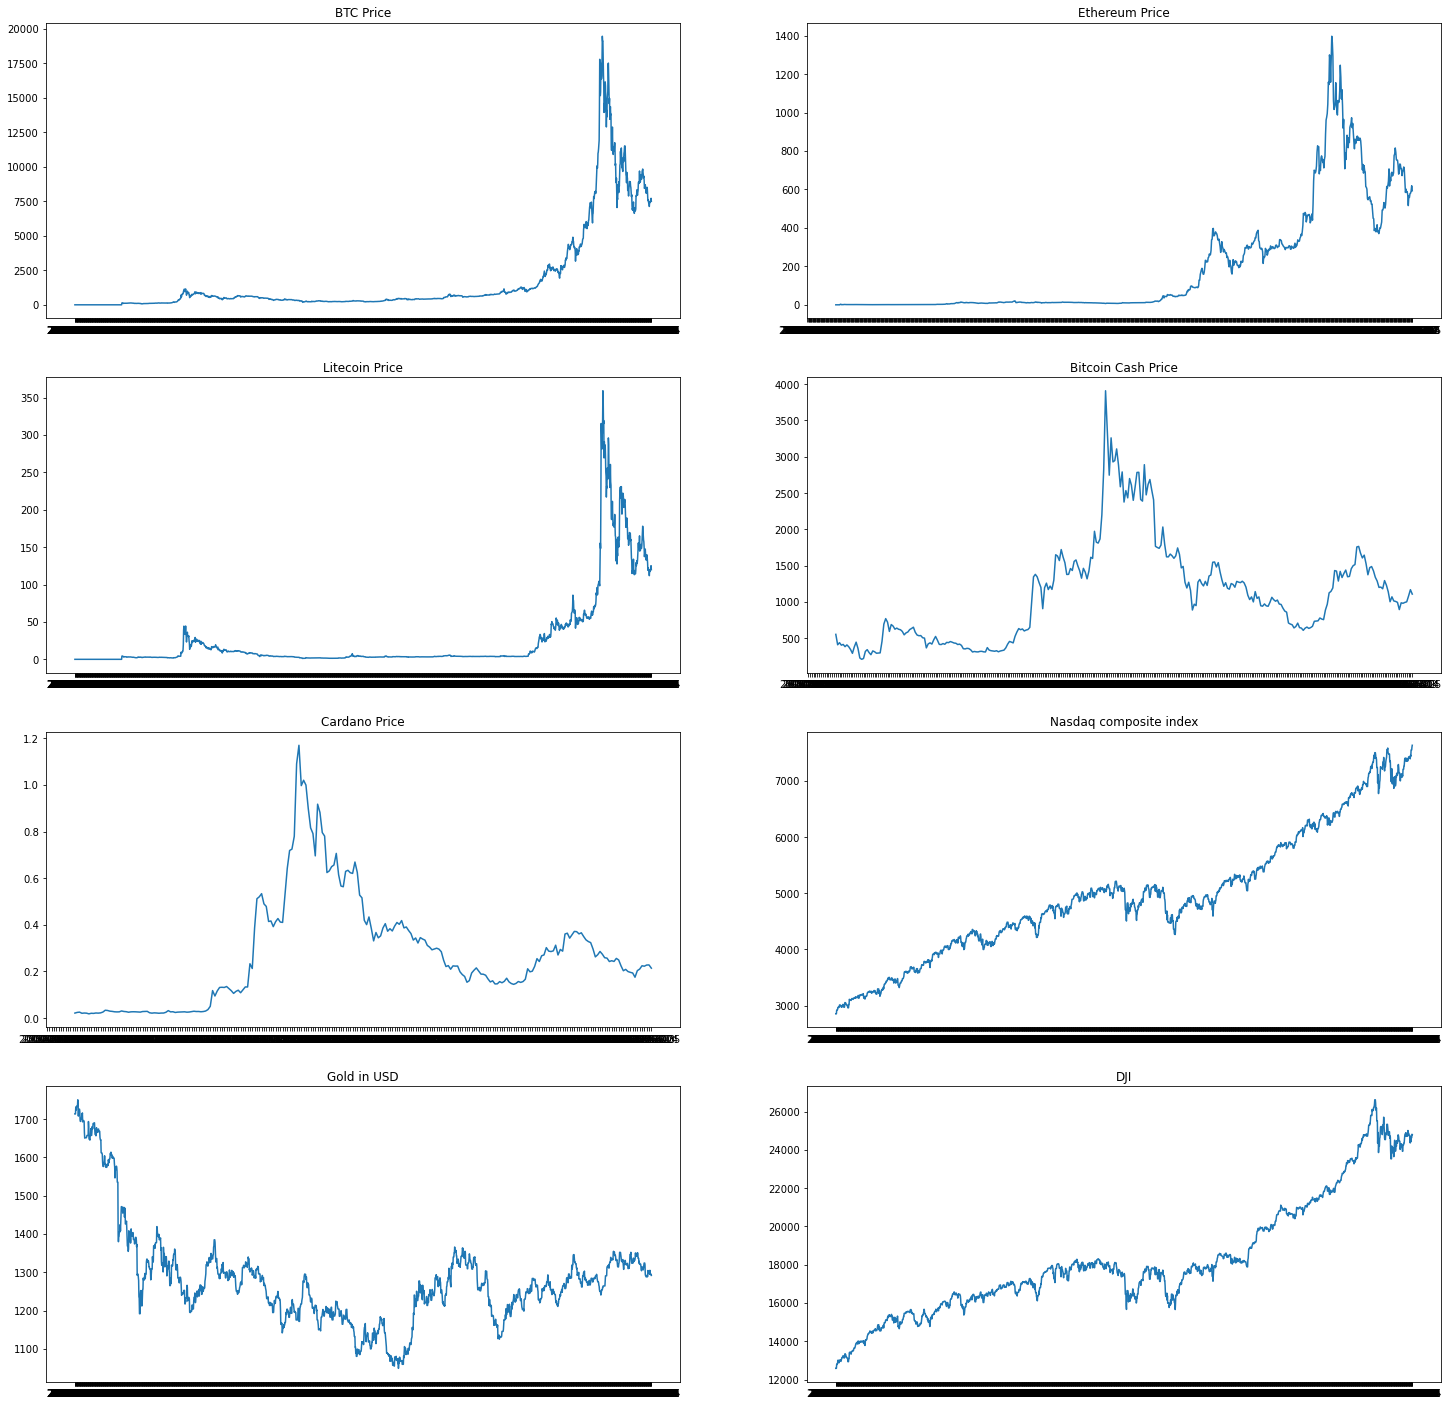

In [20]:
# ploting variables

fig, axs =plt.subplots(4,2,figsize=(25,25))
axs[0,0].plot(pricedata["BTC Price"])
axs[0,0].set_title('BTC Price')
axs[0,1].plot(pricedata["Ethereum Price"])
axs[0,1].set_title('Ethereum Price')
axs[1,0].plot(pricedata['Litecoin Price'])
axs[1,0].set_title('Litecoin Price')
axs[1,1].plot(pricedata["Bitcoin Cash Price"])
axs[1,1].set_title("Bitcoin Cash Price")
axs[2,0].plot(pricedata["Cardano Price"])
axs[2,0].set_title("Cardano Price")
axs[2,1].plot(pricedata["Nasdaq composite index"])
axs[2,1].set_title("Nasdaq composite index")
axs[3,0].plot(pricedata["Gold in USD"])
axs[3,0].set_title("Gold in USD")
axs[3,1].plot(pricedata["DJI"])
axs[3,1].set_title("DJI")
plt.show()


In [48]:
# Returns i.e. percentage change in the adjusted close price and drop the first row with NA's
returns = pricedata.pct_change().dropna(axis=0)
#view the first 5 rows of the data frame
returns.head()


,BTC Price,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
date,,,,,,,,
2017-10-02,0.012614,-0.007326,0.003084,-0.010700,-0.040403,0.135114,0.003196,0.006807
2017-10-03,0.002878,-0.001924,-0.016530,-0.021265,0.014235,0.046735,0.002300,0.003727
2017-10-04,-0.020209,0.002360,-0.015900,-0.020790,-0.041703,-0.189968,0.000447,0.000882
2017-10-05,-0.020718,0.000196,0.000068,-0.016832,-0.113261,0.052099,0.007763,0.005019
2017-10-06,0.022360,-0.009965,0.008129,0.004669,-0.008342,-0.026969,0.000732,-0.000076


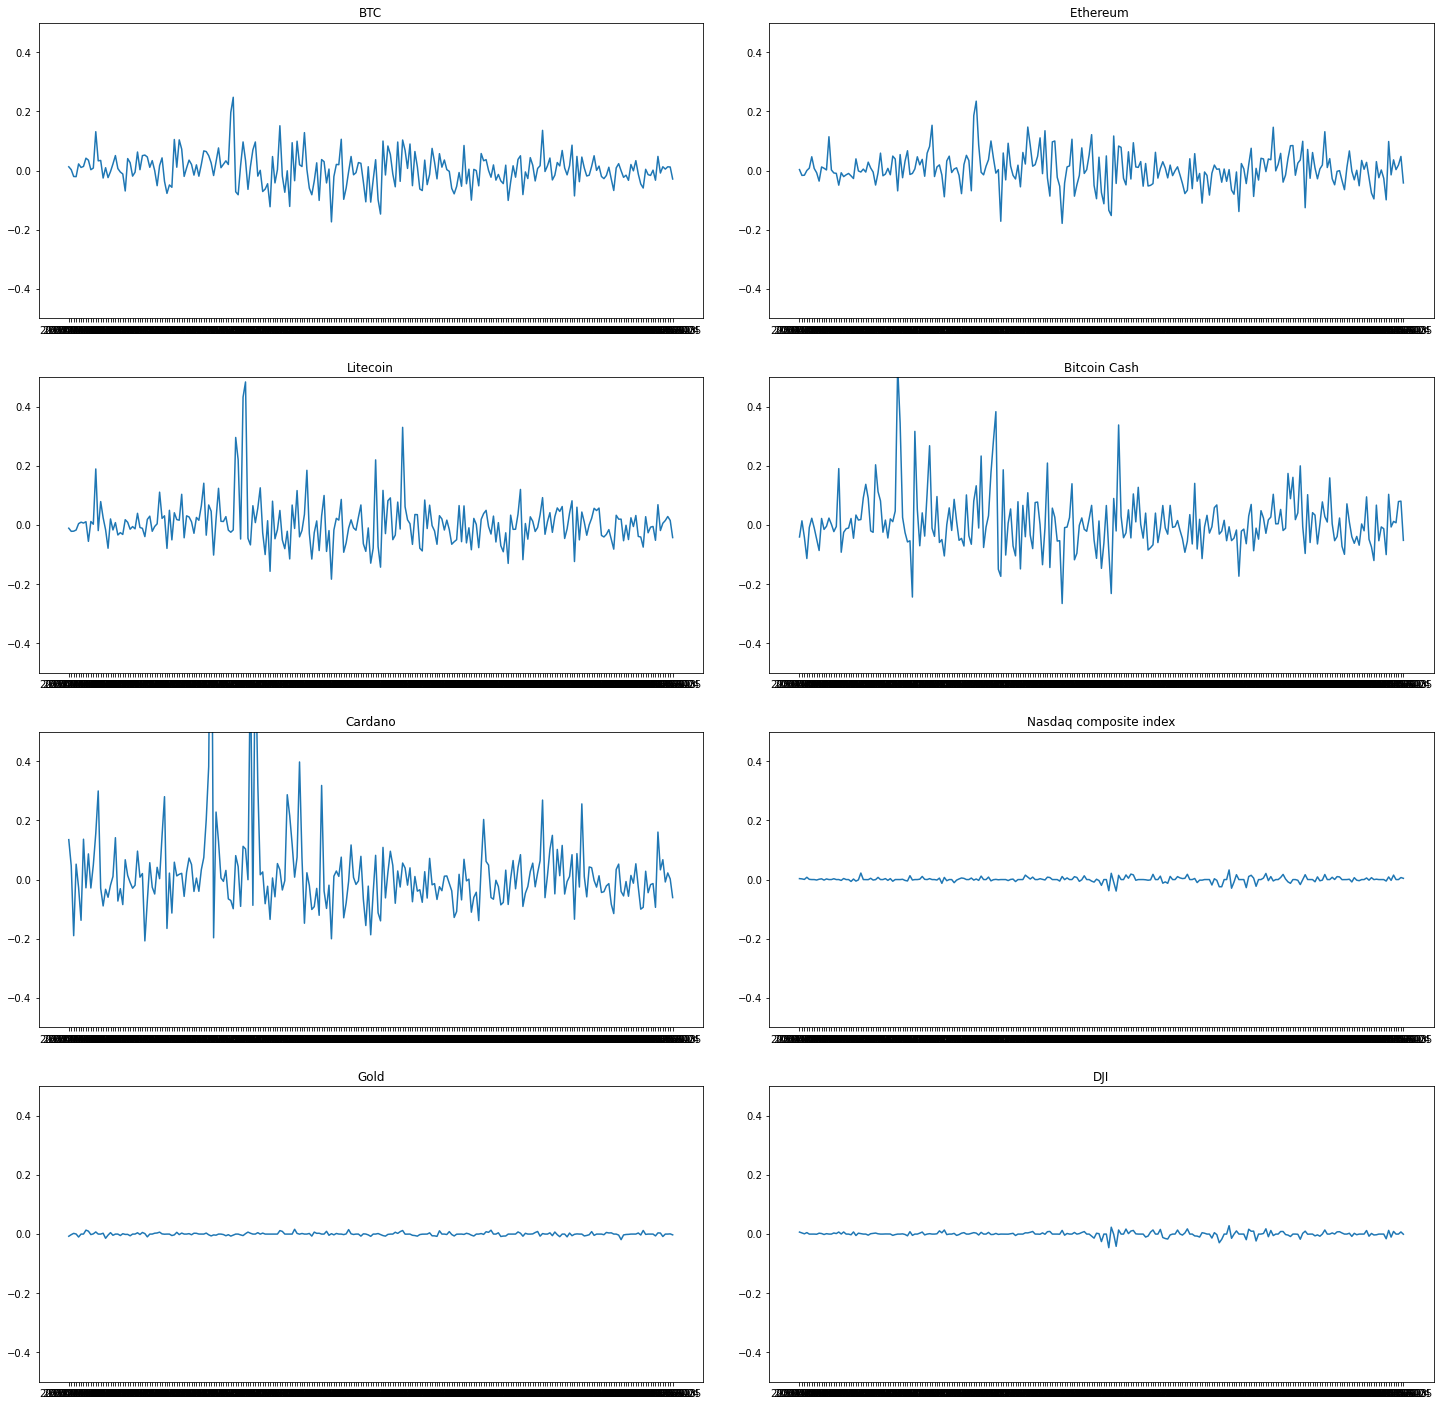

In [49]:
#ploting the returns
fig, axs = plt.subplots(4,2,figsize=(25,25),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(returns["BTC Price"])
axs[0,0].set_title("BTC")
axs[0,0].set_ylim([-0.5,0.5])
axs[0,1].plot(returns["Ethereum Price"])
axs[0,1].set_title("Ethereum ")
axs[0,1].set_ylim([-0.5,0.5])
axs[1,0].plot(returns['Litecoin Price'])
axs[1,0].set_title('Litecoin')
axs[1,0].set_ylim([-0.5,0.5])
axs[1,1].plot(returns['Bitcoin Cash Price'])
axs[1,1].set_title('Bitcoin Cash')
axs[1,1].set_ylim([-0.5,0.5])
axs[2,0].plot(returns['Cardano Price'])
axs[2,0].set_title('Cardano')
axs[2,0].set_ylim([-0.5,0.5])
axs[2,1].plot(returns['Nasdaq composite index'])
axs[2,1].set_title('Nasdaq composite index')
axs[2,1].set_ylim([-0.5,0.5])
axs[3,0].plot(returns['Gold in USD'])
axs[3,0].set_title('Gold')
axs[3,0].set_ylim([-0.5,0.5])
axs[3,1].plot(returns['DJI'])
axs[3,1].set_title('DJI')
axs[3,1].set_ylim([-0.5,0.5])
plt.show()


In [50]:
#Volatility

#volatility, standard deviation of the returns
returns.std()

BTC Price                 0.055211
Gold in USD               0.004652
Ethereum Price            0.058631
Litecoin Price            0.078212
Bitcoin Cash Price        0.098171
Cardano Price             0.145924
Nasdaq composite index    0.008509
DJI                       0.008112
dtype: float64

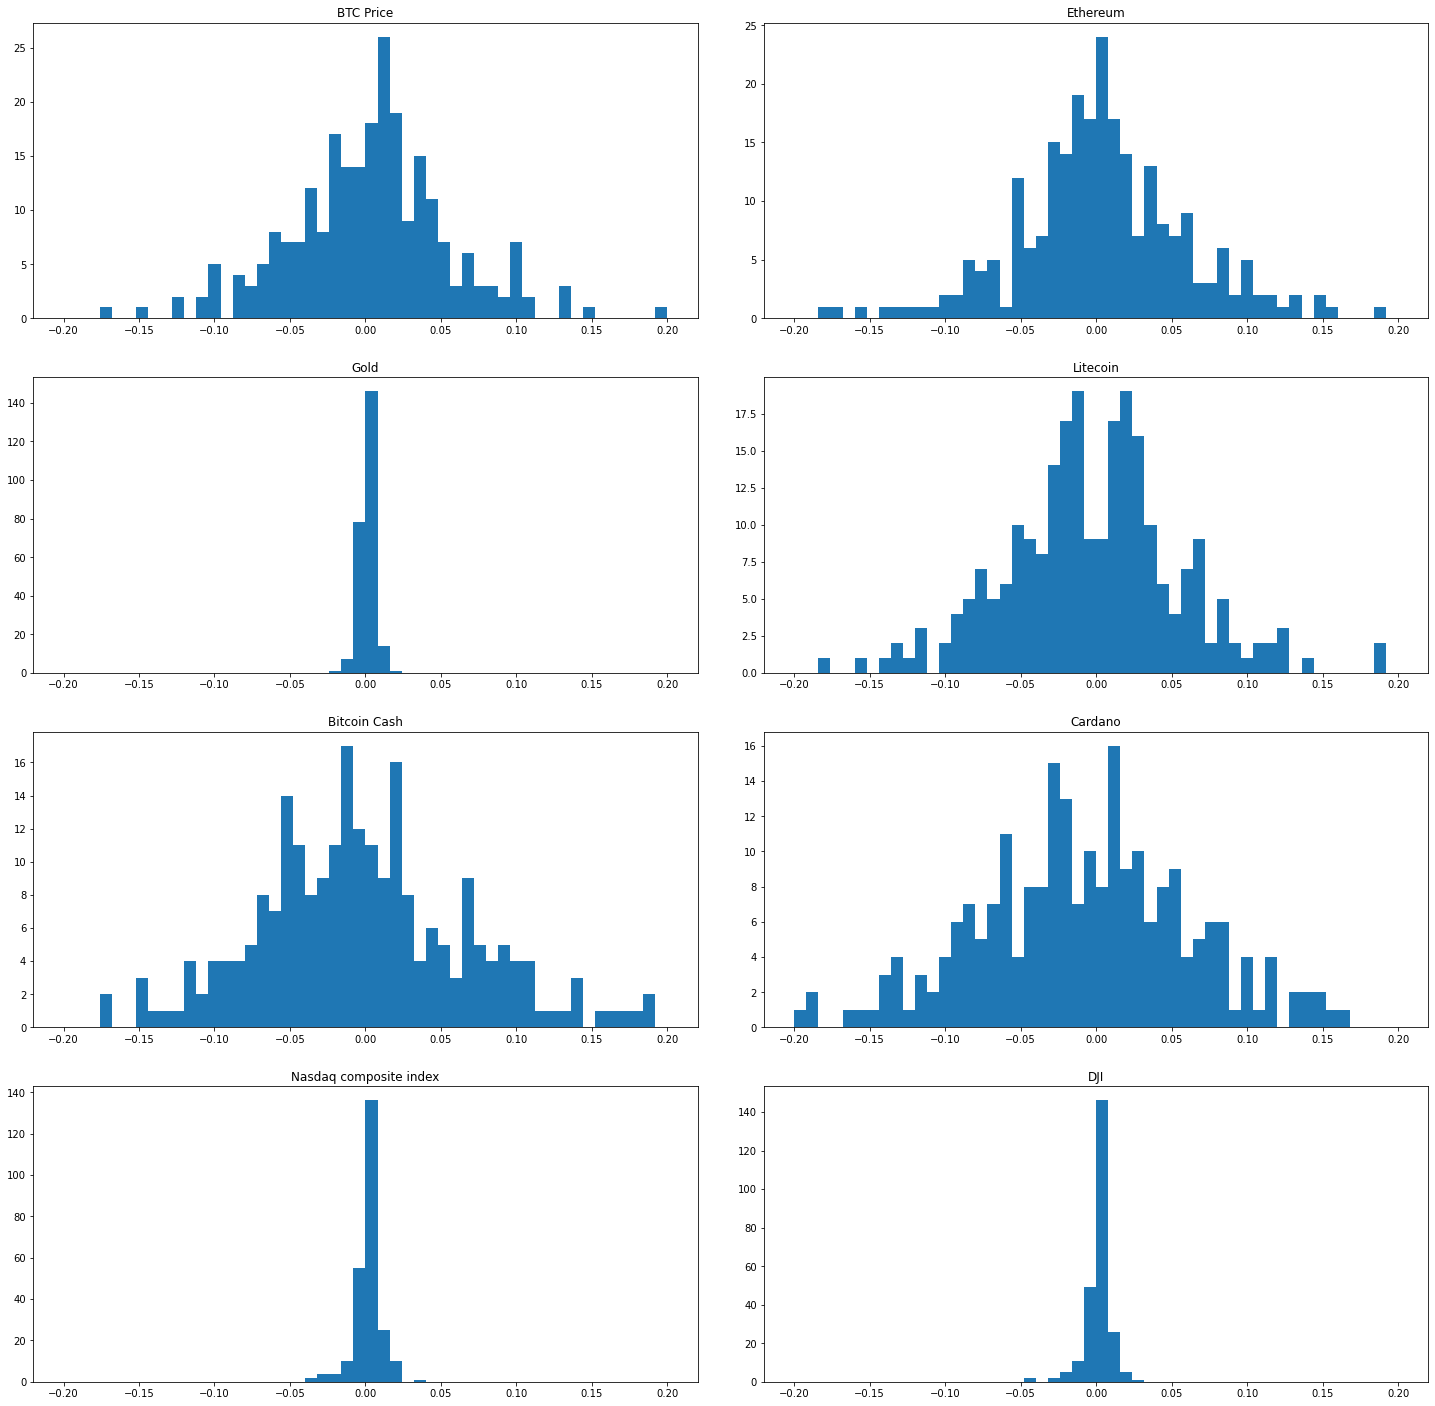

In [51]:
#ploting the histogram
fig, axs = plt.subplots(4,2,figsize=(25,25),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].hist(returns['BTC Price'], bins=50, range=(-0.2, 0.2))
axs[0,0].set_title('BTC Price')
axs[0,1].hist(returns['Ethereum Price'], bins=50, range=(-0.2, 0.2))
axs[0,1].set_title('Ethereum')
axs[1,0].hist(returns['Gold in USD'], bins=50, range=(-0.2, 0.2))
axs[1,0].set_title('Gold')
axs[1,1].hist(returns['Litecoin Price'], bins=50, range=(-0.2, 0.2))
axs[1,1].set_title('Litecoin')
axs[2,0].hist(returns['Bitcoin Cash Price'], bins=50, range=(-0.2, 0.2))
axs[2,0].set_title('Bitcoin Cash')
axs[2,1].hist(returns['Cardano Price'], bins=50, range=(-0.2, 0.2))
axs[2,1].set_title('Cardano')
axs[3,0].hist(returns['Nasdaq composite index'], bins=50, range=(-0.2, 0.2))
axs[3,0].set_title('Nasdaq composite index')
axs[3,1].hist(returns['DJI'], bins=50, range=(-0.2, 0.2))
axs[3,1].set_title('DJI')
plt.show()

In [52]:
cum_returns = ((1 + returns).cumprod() - 1) *100
cum_returns.tail()

,BTC Price,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
date,,,,,,,,
2018-06-01,72.785386,0.896267,91.898524,114.055132,129.742951,935.764369,16.292744,9.953636
2018-06-02,73.615139,0.896267,92.482175,117.319550,131.512760,927.313405,16.292744,9.953636
2018-06-03,75.812073,0.896267,96.073620,123.594487,149.926162,950.373651,16.292744,9.953636
2018-06-04,77.895440,0.962513,105.418670,127.076532,170.150907,952.472553,17.095241,10.750234
2018-06-05,72.789993,0.697529,96.786603,117.446500,156.142415,888.315343,17.578617,10.689047


Text(0.5, 1.0, 'Cumulative Returns')

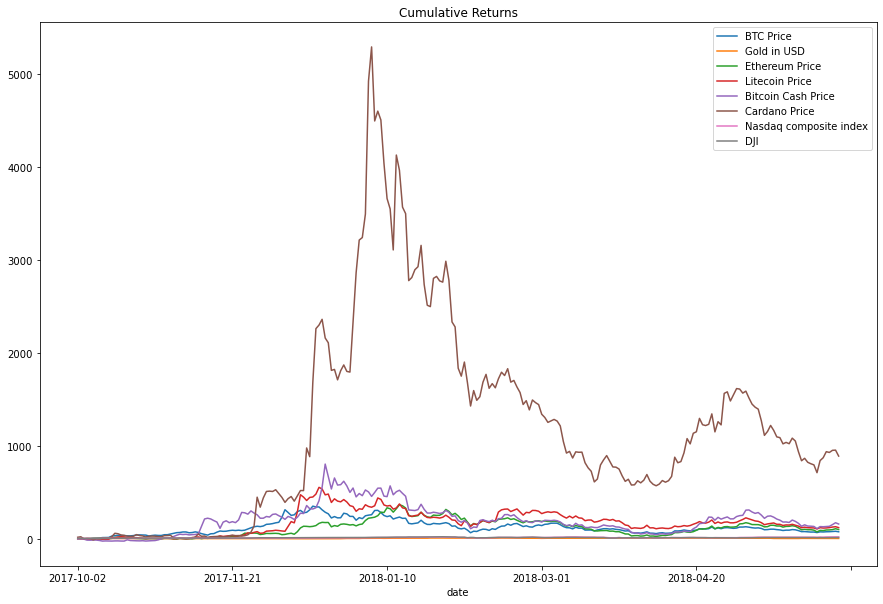

In [53]:
cum_returns.plot(figsize=(15,10))
plt.title('Cumulative Returns')

<AxesSubplot:xlabel='date'>

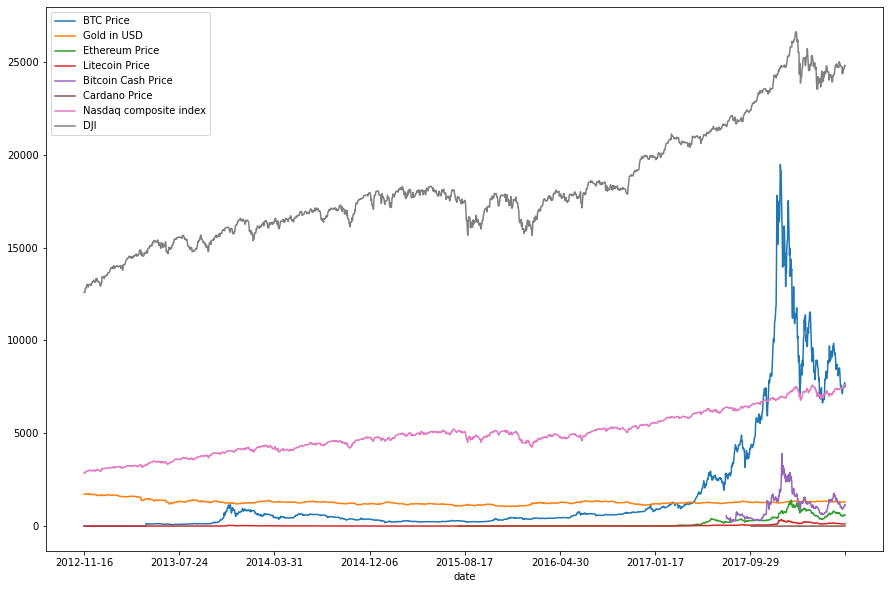

In [54]:
pricedata.plot(figsize=(15,10))

In [55]:
returns.corr()

,BTC Price,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
BTC Price,1.000000,0.019160,0.556708,0.544858,0.321193,0.327771,0.017424,0.028766
Gold in USD,0.019160,1.000000,0.066850,0.085237,0.035579,0.010379,0.119361,0.085048
Ethereum Price,0.556708,0.066850,1.000000,0.716693,0.507145,0.371916,0.027631,0.052009
Litecoin Price,0.544858,0.085237,0.716693,1.000000,0.369791,0.297185,0.024162,0.048509
Bitcoin Cash Price,0.321193,0.035579,0.507145,0.369791,1.000000,0.168495,0.007721,0.019361
Cardano Price,0.327771,0.010379,0.371916,0.297185,0.168495,1.000000,-0.013306,0.075239
Nasdaq composite index,0.017424,0.119361,0.027631,0.024162,0.007721,-0.013306,1.000000,0.871258
DJI,0.028766,0.085048,0.052009,0.048509,0.019361,0.075239,0.871258,1.000000


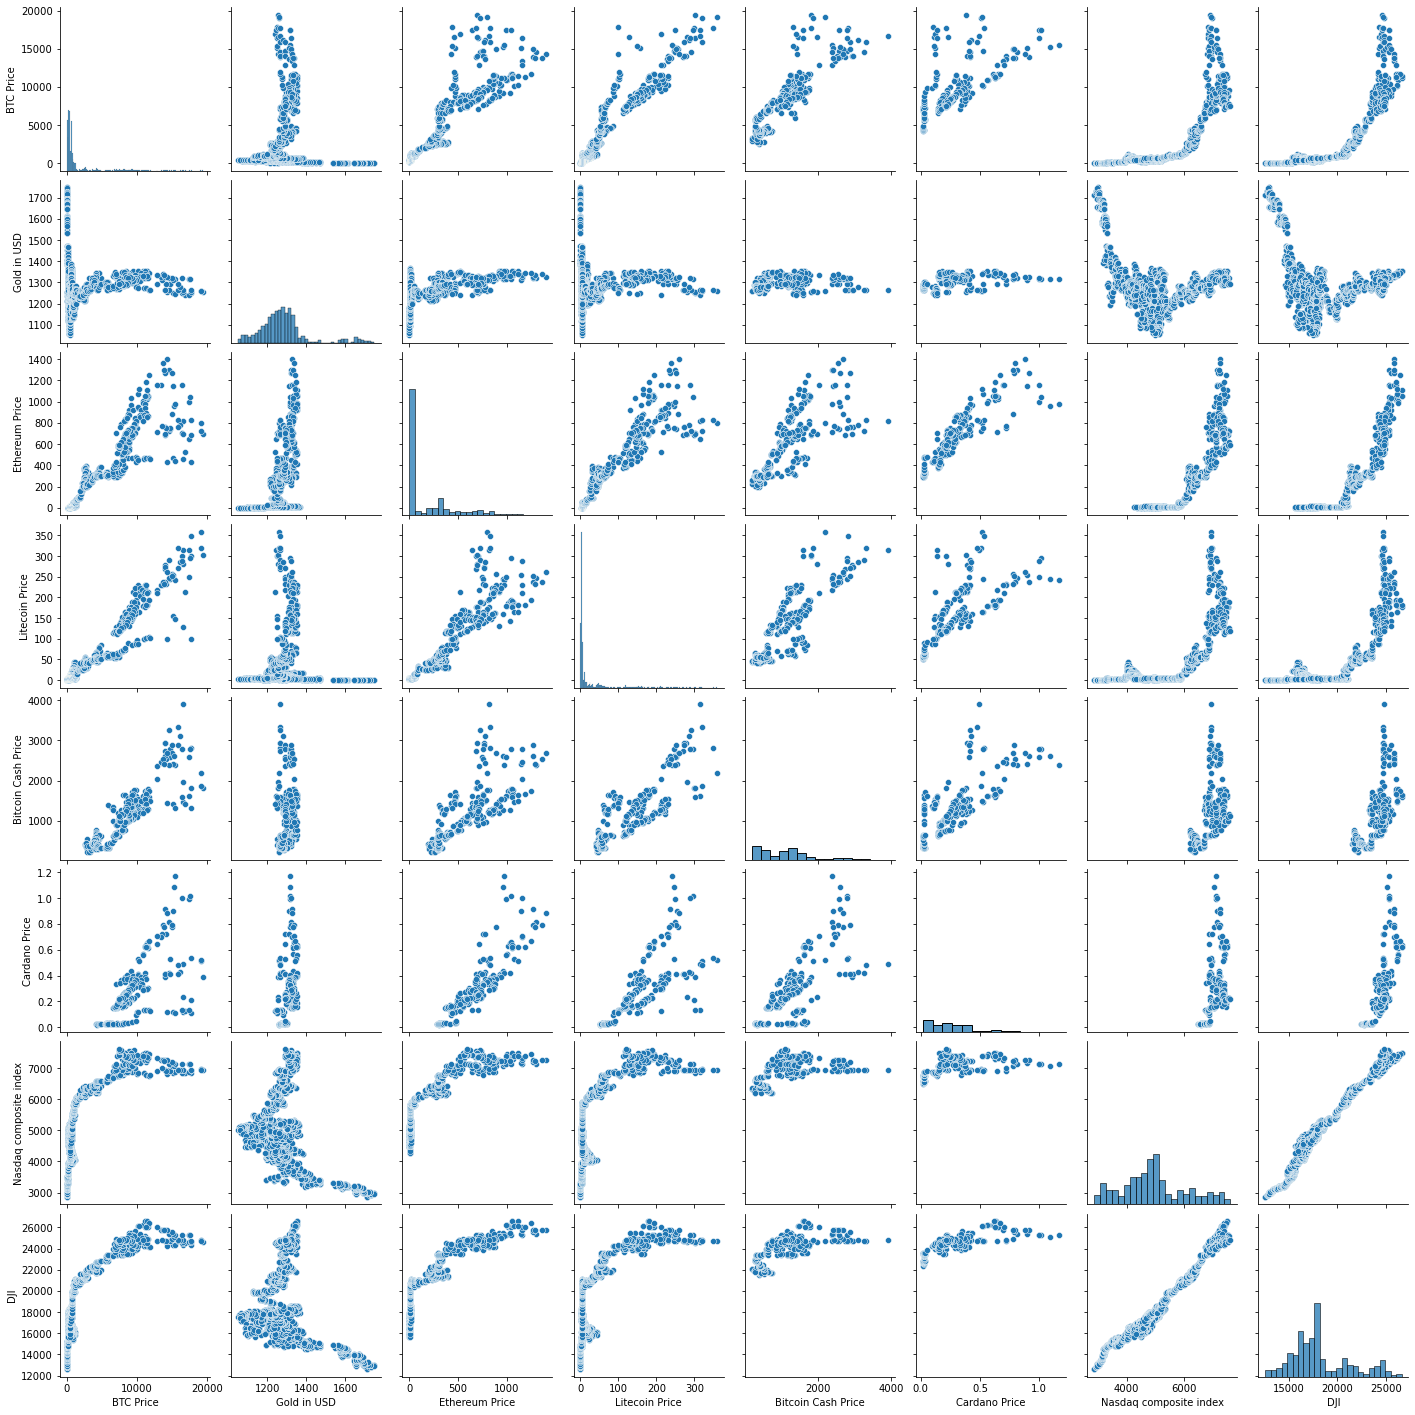

In [29]:
# Plot a pairplot of all columns present in the DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(pricedata)

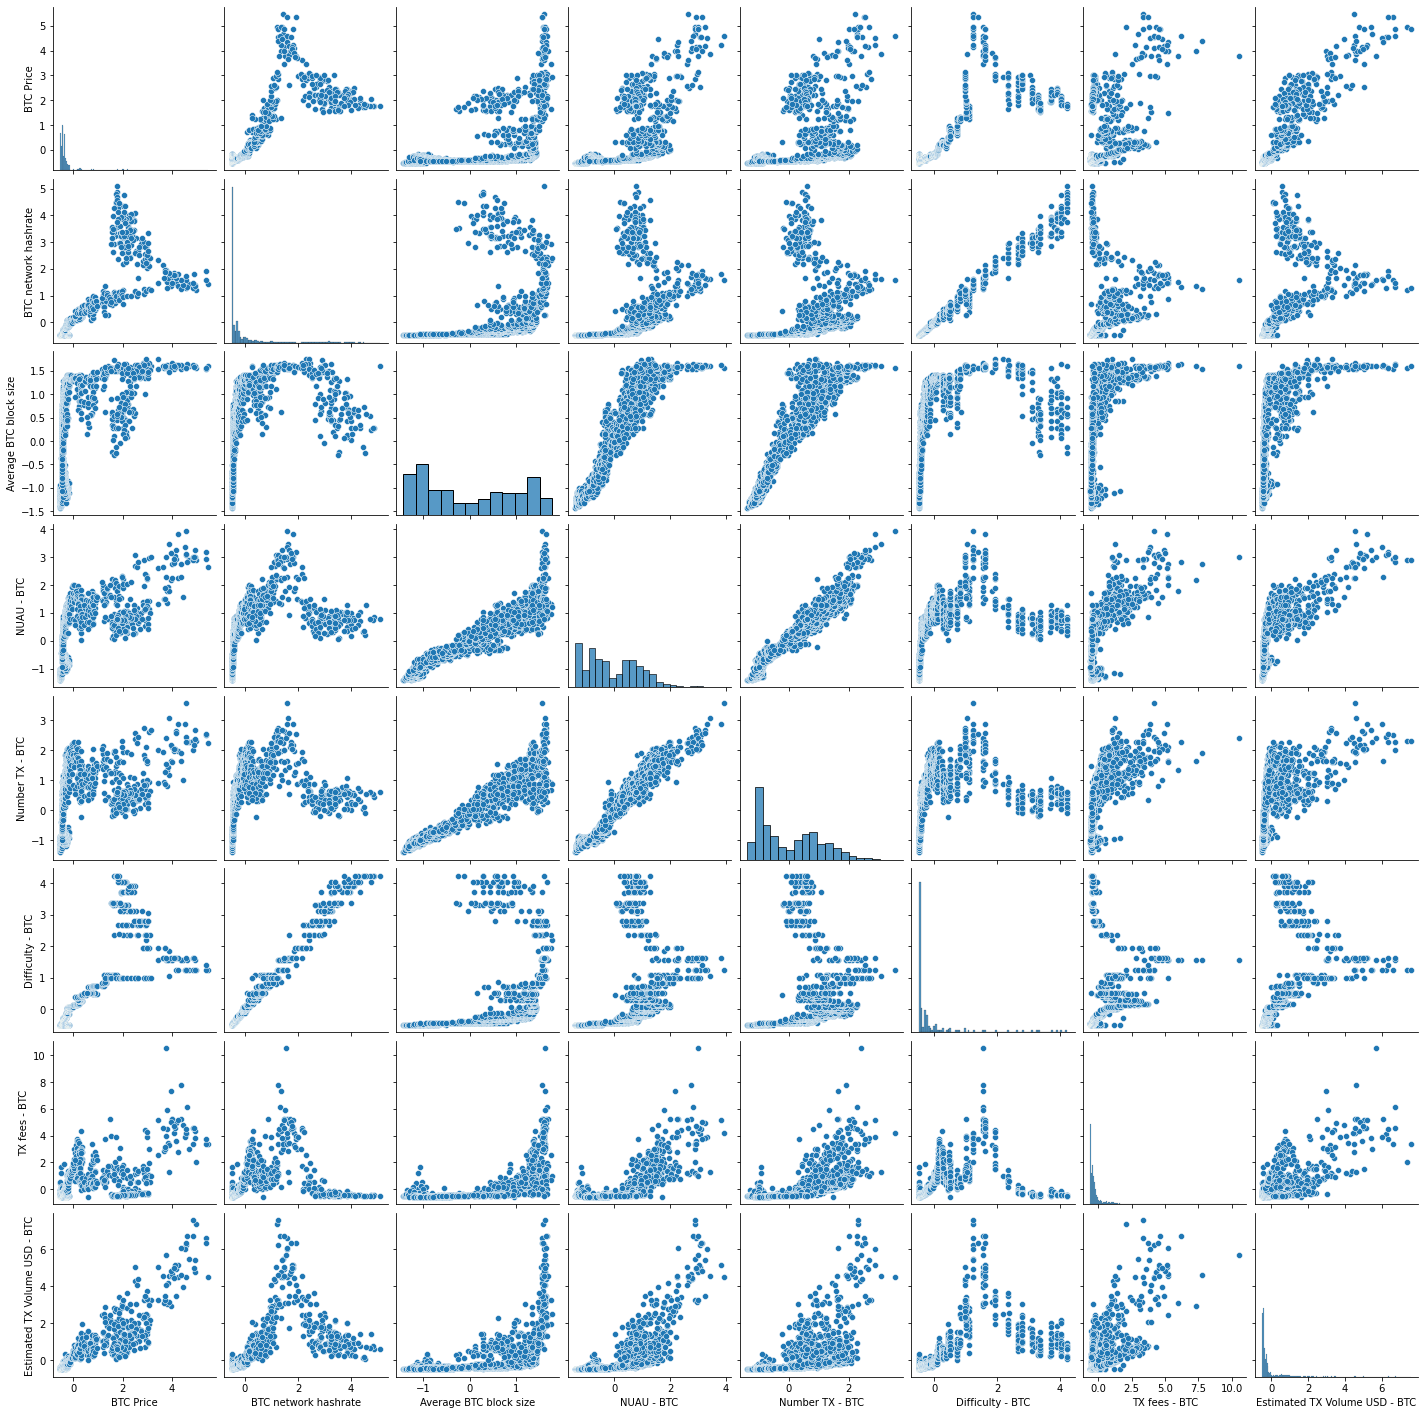

In [95]:
sns.pairplot(bitcoin_var_scaled)

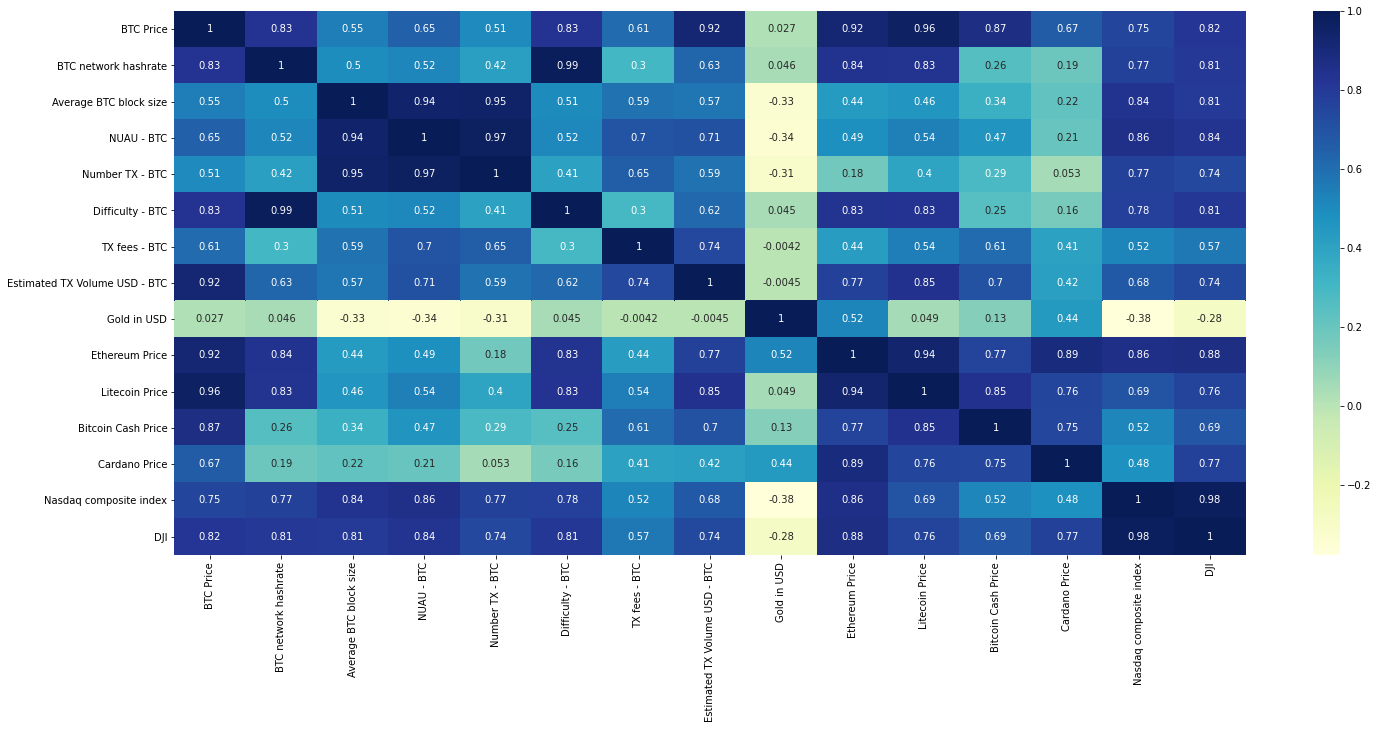

In [31]:
#Overall correlation

# plotting correlation heatmap
fig, ax = plt.subplots(figsize=(24,10))
dataplot = sns.heatmap(msdata_scaled.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()


In [98]:
corr = msdata_scaled.corr()
u = corr[corr > 0.5]
v = corr[corr < -0.5]

In [99]:
u

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
BTC Price,1.000000,0.833064,0.546698,0.645368,0.509621,0.828576,0.608411,0.921043,NaN,0.923745,0.964639,0.874739,0.666345,0.753734,0.821274
BTC network hashrate,0.833064,1.000000,NaN,0.521186,NaN,0.993986,NaN,0.632825,NaN,0.838793,0.834093,NaN,NaN,0.772796,0.811531
Average BTC block size,0.546698,NaN,1.000000,0.942037,0.948919,0.505233,0.590679,0.570189,NaN,NaN,NaN,NaN,NaN,0.840993,0.805823
NUAU - BTC,0.645368,0.521186,0.942037,1.000000,0.969138,0.516044,0.696779,0.705537,NaN,NaN,0.538319,NaN,NaN,0.856250,0.836053
Number TX - BTC,0.509621,NaN,0.948919,0.969138,1.000000,NaN,0.651735,0.587136,NaN,NaN,NaN,NaN,NaN,0.770632,0.742034
Difficulty - BTC,0.828576,0.993986,0.505233,0.516044,NaN,1.000000,NaN,0.623763,NaN,0.834332,0.830276,NaN,NaN,0.775017,0.812614
TX fees - BTC,0.608411,NaN,0.590679,0.696779,0.651735,NaN,1.000000,0.743964,NaN,NaN,0.544760,0.609337,NaN,0.522022,0.566301
Estimated TX Volume USD - BTC,0.921043,0.632825,0.570189,0.705537,0.587136,0.623763,0.743964,1.000000,NaN,0.772235,0.845501,0.704282,NaN,0.675072,0.740011
Gold in USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.522605,NaN,NaN,NaN,NaN,NaN
Ethereum Price,0.923745,0.838793,NaN,NaN,NaN,0.834332,NaN,0.772235,0.522605,1.000000,0.940247,0.766309,0.894413,0.863535,0.875113


In [100]:
v

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
BTC Price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BTC network hashrate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average BTC block size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NUAU - BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number TX - BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Difficulty - BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TX fees - BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estimated TX Volume USD - BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gold in USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ethereum Price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Outlier Detection

In [74]:
pricedata2 = pricedata.dropna(axis=0)
pricedata2

,BTC Price,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
date,,,,,,,,
2017-10-01,4341.05,1283.10,301.55,55.14,433.38,0.021678,6495.959961,22405.08984
2017-10-02,4395.81,1273.70,302.48,54.55,415.87,0.024607,6516.720215,22557.59961
2017-10-03,4408.46,1271.25,297.48,53.39,421.79,0.025757,6531.709961,22641.66992
2017-10-04,4319.37,1274.25,292.75,52.28,404.20,0.020864,6534.629883,22661.64063
2017-10-05,4229.88,1274.50,292.77,51.40,358.42,0.021951,6585.359863,22775.39063
...,...,...,...,...,...,...,...,...
2018-06-01,7500.70,1294.60,578.67,118.03,995.66,0.224533,7554.330078,24635.21094
2018-06-02,7536.72,1294.60,580.43,119.83,1003.33,0.222701,7554.330078,24635.21094
2018-06-03,7632.09,1294.60,591.26,123.29,1083.13,0.227700,7554.330078,24635.21094


<AxesSubplot:>

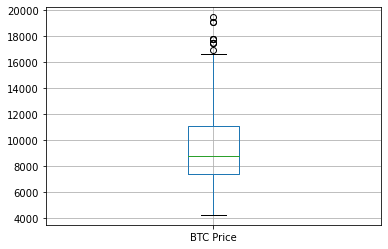

In [77]:
# Outlier detection / BoxPlot

pricedata2.boxplot('BTC Price')


<AxesSubplot:>

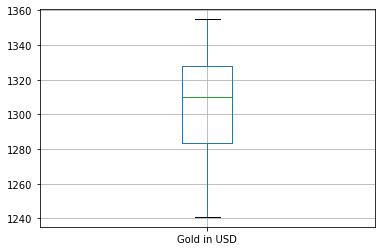

In [78]:
pricedata2.boxplot('Gold in USD')


<AxesSubplot:>

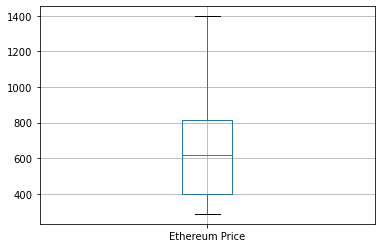

In [79]:
pricedata2.boxplot('Ethereum Price')


<AxesSubplot:>

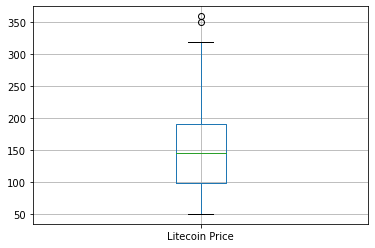

In [80]:
pricedata2.boxplot('Litecoin Price')


<AxesSubplot:>

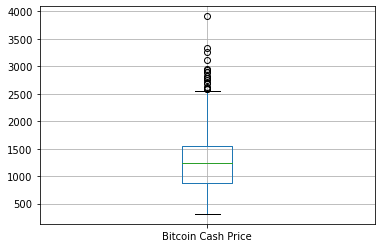

In [81]:
pricedata2.boxplot('Bitcoin Cash Price')

<AxesSubplot:>

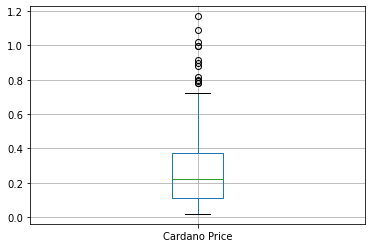

In [83]:
pricedata2.boxplot('Cardano Price')


<AxesSubplot:>

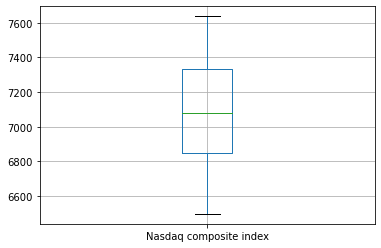

In [84]:
pricedata2.boxplot('Nasdaq composite index')


<AxesSubplot:>

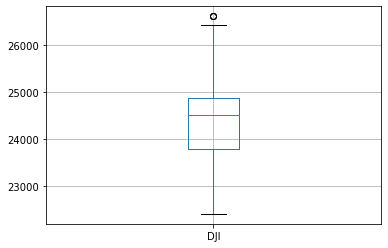

In [85]:
pricedata2.boxplot('DJI')


<AxesSubplot:>

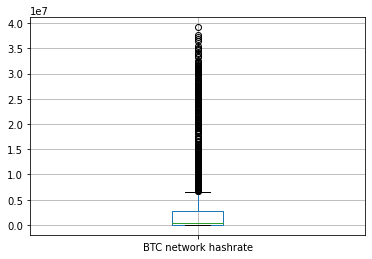

In [107]:
bitcoin_var3.boxplot('BTC network hashrate')

<AxesSubplot:>

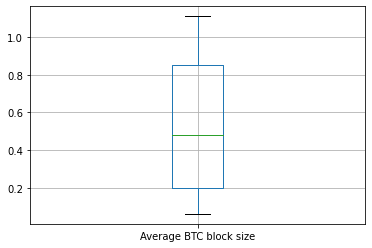

In [87]:
bitcoin_var.boxplot('Average BTC block size')

<AxesSubplot:>

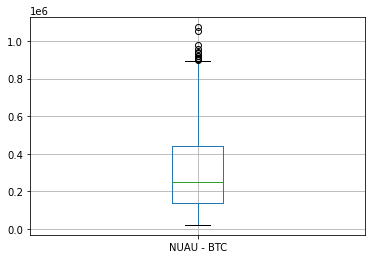

In [103]:
bitcoin_var.boxplot('NUAU - BTC')

<AxesSubplot:>

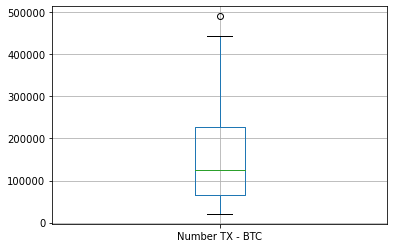

In [104]:
bitcoin_var.boxplot('Number TX - BTC')

<AxesSubplot:>

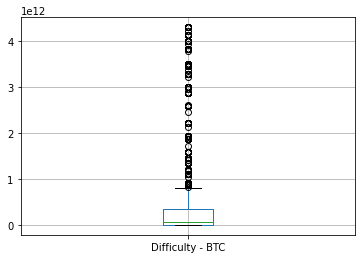

In [105]:
bitcoin_var.boxplot('Difficulty - BTC')

<AxesSubplot:>

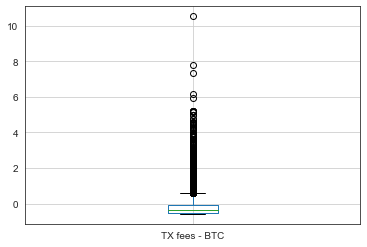

In [113]:
bitcoin_var.boxplot('TX fees - BTC')

<AxesSubplot:>

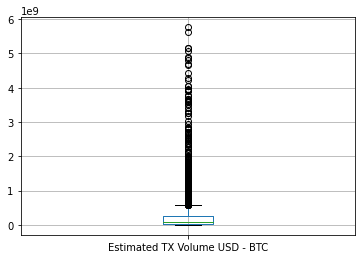

In [109]:
bitcoin_var.boxplot('Estimated TX Volume USD - BTC')